In [ ]:
pip install tensorflow==2.5.0

In [ ]:
pip install tensorflow_hub

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

#!wget --no-check-certificate \
#  https://github.com/CreaSix/MachineLearning/blob/main/ktpsample.zip \
#  -O /tmp/ktpsample.zip

In [ ]:
pd.set_option("display.precision", 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_root='/content/drive/My Drive/shoe_images'

In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/content/drive/My Drive/shoe_images
Found 124 images belonging to 4 classes.
Found 501 images belonging to 4 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 4)
['Foto_Ktp' 'Nike_Air_Max_Plus' 'Nike_Court_Royale' 'Nike_Downshifter']


In [ ]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/10
 3/16 [====>.........................] - ETA: 1:47 - loss: 1.5892 - acc: 0.3438

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


16/16 [==============================] - 171s 11s/step - loss: 1.1530 - acc: 0.4830 - val_loss: 0.6410 - val_acc: 0.7581
Epoch 2/10
16/16 [==============================] - 21s 1s/step - loss: 0.5647 - acc: 0.7545 - val_loss: 0.4589 - val_acc: 0.8548
Epoch 3/10
16/16 [==============================] - 20s 1s/step - loss: 0.4709 - acc: 0.7924 - val_loss: 0.3693 - val_acc: 0.8629
Epoch 4/10
16/16 [==============================] - 20s 1s/step - loss: 0.3338 - acc: 0.8822 - val_loss: 0.3144 - val_acc: 0.8790
Epoch 5/10
16/16 [==============================] - 20s 1s/step - loss: 0.2724 - acc: 0.9062 - val_loss: 0.2691 - val_acc: 0.9274
Epoch 6/10
16/16 [==============================] - 20s 1s/step - loss: 0.2552 - acc: 0.9202 - val_loss: 0.2492 - val_acc: 0.9274
Epoch 7/10
16/16 [==============================] - 20s 1s/step - loss: 0.2213 - acc: 0.9202 - val_loss: 0.2346 - val_acc: 0.9274
Epoch 8/10
16/16 [==============================] - 20s 1s/step - loss: 0.1942 - acc: 0.9401 - val_

In [ ]:
import tensorflow as tf
import keras

DOKUMEN_SAVED_MODEL = "saved_models/DOKUMEN"
model.save(DOKUMEN_SAVED_MODEL)
DOKUMEN_model = keras.models.load_model(DOKUMEN_SAVED_MODEL)#,
#custom_objects={'KerasLayer':hub.KerasLayer})

INFO:tensorflow:Assets written to: saved_models/DOKUMEN/assets


INFO:tensorflow:Assets written to: saved_models/DOKUMEN/assets


In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
tf_model_predictions = DOKUMEN_model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Foto_Ktp,Nike_Air_Max_Plus,Nike_Court_Royale,Nike_Downshifter
0,0.00043199,0.00404041,0.08203627,0.91349131
1,0.00273666,0.05183284,0.17779236,0.76763809
2,0.00012759,0.04624033,0.75708228,0.19654974
3,0.00262896,0.10794890,0.10608122,0.78334087
4,0.00204615,0.00521130,0.85447681,0.13826574


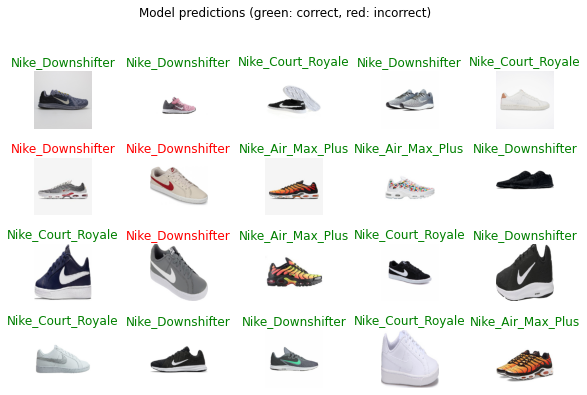

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(20):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
!mkdir "tflite_models"
TFLITE_MODEL = "tflite_models/DOKUMEN.tflite"
TFLITE_QUANT_MODEL = "tflite_models/DOKUMEN_quant.tflite"

In [ ]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : DOKUMEN_model(x))
# Save the concrete function.
concrete_func = run_model.get_concrete_function(
tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)
# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)
# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)
print("TFLite models and their sizes:")
!ls "tflite_models" -lh

TFLite models and their sizes:
total 12M
-rw-r--r-- 1 root root 2.7M Jun  3 14:48 DOKUMEN_quant.tflite
-rw-r--r-- 1 root root 8.6M Jun  3 14:48 DOKUMEN.tflite
